In [66]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt

#### João Santos de Sousa Filho
###### Disciplina: Mineração de Dados
###### Prof: Dr. Paulo Ribeiro

##### Projeto 2.1 - Nessa parte é implementado um preditor de cliques de publicidade, usando regressão logística.

<p>Carregando o conjunto de dados</p>

In [67]:
df = pd.read_csv("data/advertising.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


<p>Retirando os atributos não numericos e separando o conjunto de dados da variavel que será predita.</p>

In [68]:
df2=df.drop(['Country','Timestamp','City','Ad Topic Line'],axis=1)
y = df['Clicked on Ad']
X = df2.drop('Clicked on Ad',axis=1)

<p>Gerando os conjuntos de testes e de treinamento e instanciando o modelo treinado.</p>

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
model = LogisticRegression().fit(X_train,y_train)

C:\Users\j_ssf\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<p>Gerando amostras individuais para testes.</p>

In [70]:
amostras = df2.sample(n=3)
X_amostras = amostras.drop('Clicked on Ad', axis=1)
y_amostras = amostras['Clicked on Ad']

<p>Gerando os conjuntos de predições.</p>

In [71]:
y_pred = model.predict(X_test)

y_pred_amostras = model.predict(X_amostras)

<p>Mostrando Valores das Metricas com Base nos resultados encontrados.</p>

Matriz de Confusão: 


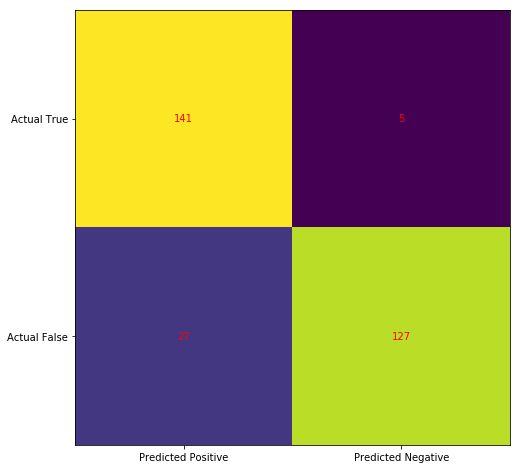

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       146
           1       0.96      0.82      0.89       154

   micro avg       0.89      0.89      0.89       300
   macro avg       0.90      0.90      0.89       300
weighted avg       0.90      0.89      0.89       300

Acuracia:  0.8933333333333333


In [72]:
print("Matriz de Confusão: ")

cm = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Positive', 'Predicted Negative'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual True', 'Actual False'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


print(classification_report(y_test,y_pred))
print("Acuracia: ",accuracy_score(y_test, y_pred))

<p>Para o conjunto de amostras.</p>

In [73]:
print("Acuracia Amostra: ", accuracy_score(y_amostras, y_pred_amostras))

Acuracia Amostra:  1.0
